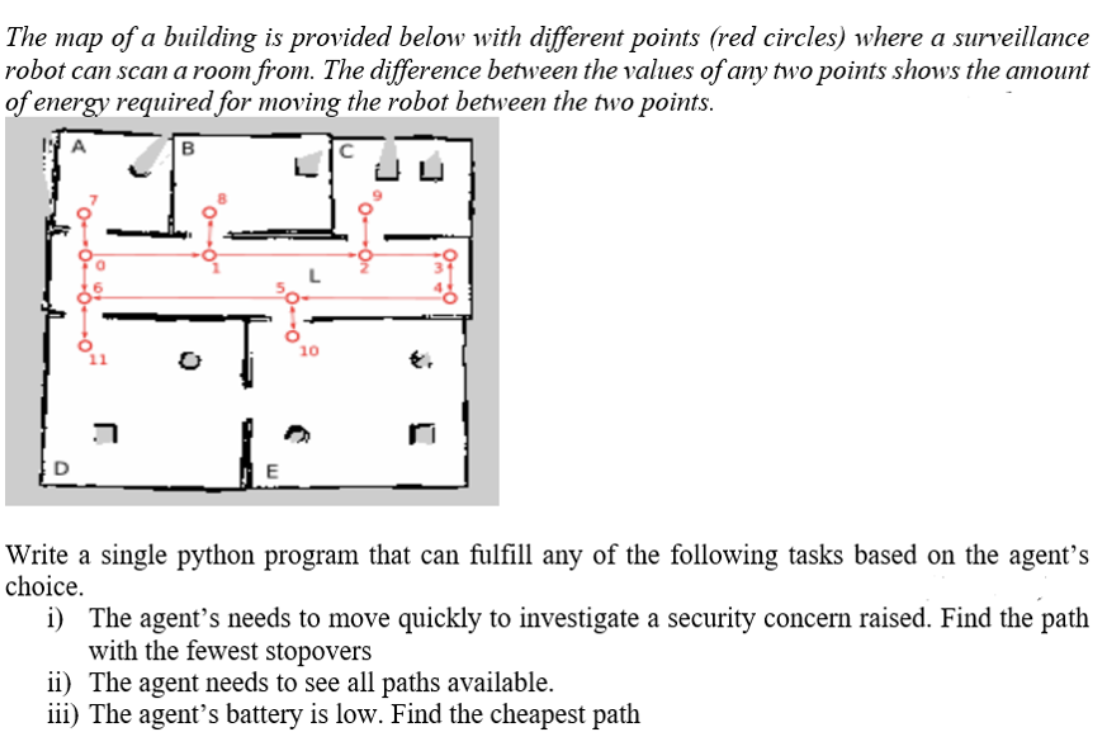

In [1]:
class Environment(object):
    MyGraph = {"1": set(["0","2","8"]),
               "2": set(["3", "9"]),
               "3": set(["4"]),
               "4": set(["3", "5"]),
               "5": set(["6", "10"]),
               "6": set(["11", "0"]),
               "7": set(["0"]),
               "8": set(["1"]),
               "9": set(["2"]),
              "10": set(["5"]),
              "11": set(["6"]),
               "0": set(["1", "6", "7"])}
    Cost = {str(["1", "2"]) : "1", str(["1", "8"]) : "7", str(["1", "0"]) : "1",
            str(["2", "3"]) : "1", str(["2", "9"]) : "7", 
            str(["3", "4"]) : "1", 
            str(["4", "3"]) : "1", str(["4", "5"]) : "1",
            str(["5", "6"]) : "1", str(["5", "10"]) : "5",
            str(["6", "11"]): "5", str(["6", "0"]) : "6",
            str(["7", "0"]) : "7",
            str(["8", "1"]) : "7",
            str(["9", "2"]) : "7",
            str(["10", "5"]): "5",
            str(["11", "6"]): "5",
            str(["0", "1"]) : "1", str(["0", "6"]) : "6", str(["0", "7"]) : "7"
           }
    State = "3"
    TheGoal = "0"

class Agent(Environment):
    def dfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next]) 
                else:
                    stack.append((next, path + [next]))      
        return p
    
    def bfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop(0) 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next])
                    return p
                else:
                    stack.append((next, path + [next]))
        return p
    
    def getCost(path_to_cost):
        i = 0
        pathCost = 0
        while i<len(path_to_cost) - 1:
            l = []
            l.append(path_to_cost[i])
            l.append(path_to_cost[i + 1])
            pathCost = pathCost + int(Environment.Cost[str(l)])
            i = i + 1
            
        return pathCost
        
    
    def UCS(self, graph, start, goal):
        stack = [(start, [start])] 
        p = []
        c = []
        leastCost = 1000
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    pathCost = Agent.getCost(path + [next])
                    print("Path: ", path+[next], "Path Cost: ", pathCost)
                    if pathCost < leastCost:
                        leastCost = pathCost
                        p = path + [next]
                else:
                    stack.append((next, path + [next]))      
        return p

    
    def __init__(self, Environment):
        print("Depth First Search: ", self.dfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Breadth First Search: ", self.bfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Uniform Cost Search: ", self.UCS(Environment.MyGraph, Environment.State, Environment.TheGoal))
        
TheEnvironment = Environment()
TheAgent = Agent(TheEnvironment)

Depth First Search:  [['3', '4', '5', '6', '0']]
Breadth First Search:  [['3', '4', '5', '6', '0']]
Path:  ['3', '4', '5', '6', '0'] Path Cost:  9
Uniform Cost Search:  ['3', '4', '5', '6', '0']
